<a href="https://colab.research.google.com/github/syedfaizal04/SAR-Despeckling-Dataset/blob/main/SAR_Despeckilng_dataset_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Install Kaggle
!pip install -q kaggle

# Upload your kaggle.json API key
from google.colab import files
files.upload()

# Create Kaggle directory and move kaggle.json there
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [11]:
!kaggle datasets download -d javidtheimmortal/sar-despeckling-dataset --unzip


Dataset URL: https://www.kaggle.com/datasets/javidtheimmortal/sar-despeckling-dataset
License(s): apache-2.0
 99% 961M/974M [00:11<00:00, 105MB/s] 
100% 974M/974M [00:11<00:00, 88.6MB/s]


In [12]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
base_dir = '/content/Main folder'
train_dir = os.path.join(base_dir, '/content/SAR despeckling filters dataset/Main folder/GTruth')
val_dir = os.path.join(base_dir, '/content/SAR despeckling filters dataset/Main folder/GTruth_val')
noisy_train_dir = os.path.join(base_dir, '/content/SAR despeckling filters dataset/Main folder/Noisy')
noisy_val_dir = os.path.join(base_dir, '/content/SAR despeckling filters dataset/Main folder/Noisy_val')

# Check the dataset structure
print(f'Train Images: {len(os.listdir(train_dir))}')
print(f'Validation Images: {len(os.listdir(val_dir))}')
print(f'Noisy Train Images: {len(os.listdir(noisy_train_dir))}')
print(f'Noisy Validation Images: {len(os.listdir(noisy_val_dir))}')


Train Images: 1500
Validation Images: 100
Noisy Train Images: 1500
Noisy Validation Images: 100


In [25]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate

def create_despeckling_model(input_shape=(256, 256, 1)):
    inputs = Input(input_shape)

    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    p2 = MaxPooling2D((2, 2))(c2)

    # Bottleneck
    bn = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)

    # Decoder
    u1 = UpSampling2D((2, 2))(bn)
    c3 = Conv2D(128, (3, 3), activation='relu', padding='same')(u1)

    u2 = UpSampling2D((2, 2))(c3)
    c4 = Conv2D(64, (3, 3), activation='relu', padding='same')(u2)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c4)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

model = create_despeckling_model()
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 256, 256, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 128, 128, 256)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 128)       │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 256, 256, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 256, 256, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 256, 256, 1)         │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 738,561 (2.82 MB)

 Trainable params: 738,561 (2.82 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
def load_dataset(directory):
    files = list_tiff_files(directory)
    if len(files) == 0:
        raise ValueError(f"No .tiff files found in the directory: {directory}")

    images = []
    for filename in files:
        filepath = os.path.join(directory, filename)
        image = load_tiff_image(filepath)  # Assuming load_tiff_image is defined
        images.append(image)

    return tf.stack(images)


In [27]:
!pip install tensorflow-io
import tensorflow as tf
import tensorflow_io as tfio

def load_tiff_image(path):
    image_data = tf.io.read_file(path)
    # Use tfio.experimental.image.decode_tiff instead of tf.image.decode_image
    image = tfio.experimental.image.decode_tiff(image_data)  # Decode TIFF

    # Check if the image has more than 3 channels and slice if necessary
    if image.shape[-1] > 3:
        image = image[..., :3]  # Keep only the first 3 channels (RGB)

    image = tf.image.rgb_to_grayscale(image)  # Convert to grayscale
    image = tf.image.resize(image, (256, 256))  # Resize to a fixed size
    return image / 255.0  # Normalize to [0, 1]

def load_dataset(directory):
    images = []
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        # Skip if it's not a file
        if os.path.isfile(filepath) and filename.endswith(".tiff"):
            image = load_tiff_image(filepath)
            images.append(image)
        else:
            print(f"Skipping non-file or unsupported file: {filepath}")

    if not images:
        raise ValueError(f"No valid .tiff images found in {directory}.")

    return tf.stack(images)

# Test paths
train_dir = '/content/SAR despeckling filters dataset/Main folder/GTruth'
train_images = load_dataset(train_dir)
print(f"Loaded {train_images.shape[0]} images from {train_dir}.")

Loaded 1500 images from /content/SAR despeckling filters dataset/Main folder/GTruth.


In [28]:
def load_dataset(directory):
    files = [os.path.join(directory, f) for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f)) and f.endswith('.tiff')]

    if len(files) == 0:
        raise ValueError(f"No .tiff files found in the directory: {directory}")

    images = []
    for filepath in files:
        image = load_tiff_image(filepath)  # Assuming `load_tiff_image` is defined
        images.append(image)

    return tf.stack(images)

# Test the dataset loading
try:
    train_dir = '/content/SAR despeckling filters dataset/Main folder/GTruth'
    train_images = load_dataset(train_dir)
    print(f"Loaded {train_images.shape[0]} images from {train_dir}.")
except ValueError as e:
    print(e)


Loaded 1500 images from /content/SAR despeckling filters dataset/Main folder/GTruth.


In [29]:
print(f"Dataset Path: {os.path.abspath(train_dir)}")


Dataset Path: /content/SAR despeckling filters dataset/Main folder/GTruth


In [30]:
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import Sequence

class CustomDataGenerator(Sequence):
    def __init__(self, noisy_dir, truth_dir, batch_size, target_size=(256, 256), shuffle=True, **kwargs):
        # Initialize the parent class (fixing the warning)
        super().__init__(**kwargs)  # Ensure Keras optimizations work correctly

        self.noisy_dir = noisy_dir
        self.truth_dir = truth_dir
        self.batch_size = batch_size
        self.target_size = target_size
        self.shuffle = shuffle

        # List all files in the noisy directory
        self.noisy_images = os.listdir(noisy_dir)
        self.truth_images = os.listdir(truth_dir)

        self.indexes = np.arange(len(self.noisy_images))
        self.on_epoch_end()

    def __len__(self):
        # Number of batches per epoch
        return int(np.floor(len(self.noisy_images) / self.batch_size))

    def __getitem__(self, index):
        # Generate one batch of data
        batch_indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        noisy_batch = [self.noisy_images[k] for k in batch_indexes]
        truth_batch = [self.truth_images[k] for k in batch_indexes]

        noisy_images = np.array([self._load_image(self.noisy_dir, img) for img in noisy_batch])
        truth_images = np.array([self._load_image(self.truth_dir, img) for img in truth_batch])

        return noisy_images, truth_images

    def on_epoch_end(self):
        # Shuffle the data after each epoch
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def _load_image(self, dir_path, img_name):
        # Load image from file
        img_path = os.path.join(dir_path, img_name)
        img = load_img(img_path, target_size=self.target_size, color_mode='grayscale')
        img = img_to_array(img) / 255.0  # Normalize the image
        return img



In [31]:
# Define paths to your dataset
noisy_train_dir = '/content/SAR despeckling filters dataset/Main folder/Noisy'  # Noisy training images
truth_train_dir = '/content/SAR despeckling filters dataset/Main folder/GTruth'  # Ground truth training images

noisy_val_dir = '/content/SAR despeckling filters dataset/Main folder/Noisy_val'  # Noisy validation images
truth_val_dir = '/content/SAR despeckling filters dataset/Main folder/GTruth_val'  # Ground truth validation images

# Initialize the generators
train_generator = CustomDataGenerator(noisy_train_dir, truth_train_dir, batch_size=32)
val_generator = CustomDataGenerator(noisy_val_dir, truth_val_dir, batch_size=32)

# Train the model
history = model.fit(
    train_generator,                # Training data
    validation_data=val_generator,  # Validation data
    epochs=50,                      # Number of training epochs
    verbose=1                       # Verbosity mode (1 = progress bar)
)


Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.0180 - loss: 0.0303 - val_accuracy: 0.0214 - val_loss: 0.0139
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 38s 737ms/step - accuracy: 0.0202 - loss: 0.0050 - val_accuracy: 0.0117 - val_loss: 0.0085
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 37s 720ms/step - accuracy: 0.0262 - loss: 0.0037 - val_accuracy: 0.0214 - val_loss: 0.0070
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 38s 718ms/step - accuracy: 0.0200 - loss: 0.0034 - val_accuracy: 0.0214 - val_loss: 0.0066
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 41s 722ms/step - accuracy: 0.0189 - loss: 0.0032 - val_accuracy: 0.0212 - val_loss: 0.0061
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 41s 731ms/step - accuracy: 0.0191 - loss: 0.0030 - val_accuracy: 0.0214 - val_loss: 0.0062
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 41s 731ms/step - accuracy: 0.0200 - loss: 0.0030 - val_accuracy: 0.0211 - val_loss: 0.0058
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 41s 728ms/step - accuracy: 0.0122 - loss: 0.0028 - val_accurac

In [37]:
model.save('sar_denoising_model.keras')


In [39]:
from tensorflow.keras.models import load_model

# Load the model from the .keras file
model = load_model('sar_denoising_model.keras')



Epoch 1:
  Training Accuracy: 0.0197
  Validation Accuracy: 0.0214
Epoch 2:
  Training Accuracy: 0.0199
  Validation Accuracy: 0.0117
Epoch 3:
  Training Accuracy: 0.0199
  Validation Accuracy: 0.0214
Epoch 4:
  Training Accuracy: 0.0186
  Validation Accuracy: 0.0214
Epoch 5:
  Training Accuracy: 0.0199
  Validation Accuracy: 0.0212
Epoch 6:
  Training Accuracy: 0.0186
  Validation Accuracy: 0.0214
Epoch 7:
  Training Accuracy: 0.0199
  Validation Accuracy: 0.0211
Epoch 8:
  Training Accuracy: 0.0192
  Validation Accuracy: 0.0214
Epoch 9:
  Training Accuracy: 0.0199
  Validation Accuracy: 0.0214
Epoch 10:
  Training Accuracy: 0.0199
  Validation Accuracy: 0.0211
Epoch 11:
  Training Accuracy: 0.0199
  Validation Accuracy: 0.0214
Epoch 12:
  Training Accuracy: 0.0199
  Validation Accuracy: 0.0213
Epoch 13:
  Training Accuracy: 0.0185
  Validation Accuracy: 0.0214
Epoch 14:
  Training Accuracy: 0.0199
  Validation Accuracy: 0.0214
Epoch 15:
  Training Accuracy: 0.0199
  Validation Accura

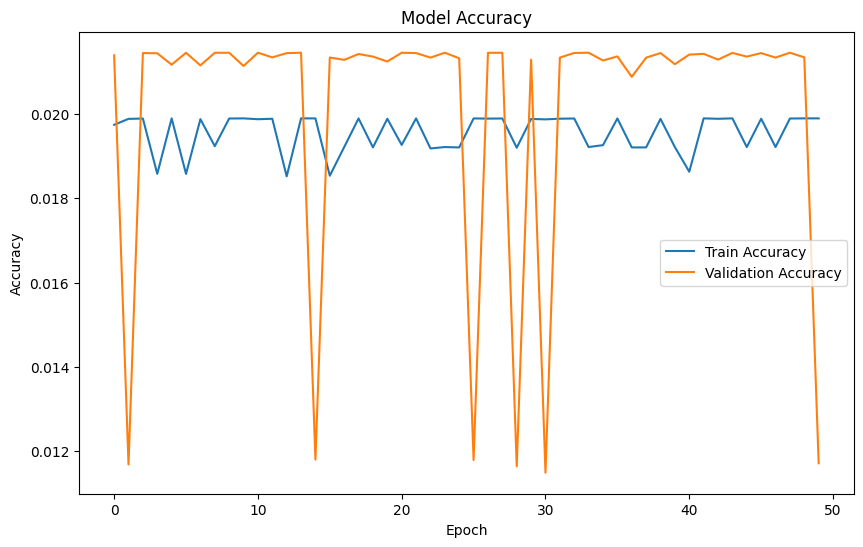

In [41]:
import matplotlib.pyplot as plt

for epoch in range(len(history.history['accuracy'])):
    print(f"Epoch {epoch + 1}:")
    print(f"  Training Accuracy: {history.history['accuracy'][epoch]:.4f}")
    print(f"  Validation Accuracy: {history.history['val_accuracy'][epoch]:.4f}")

# Plot the accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

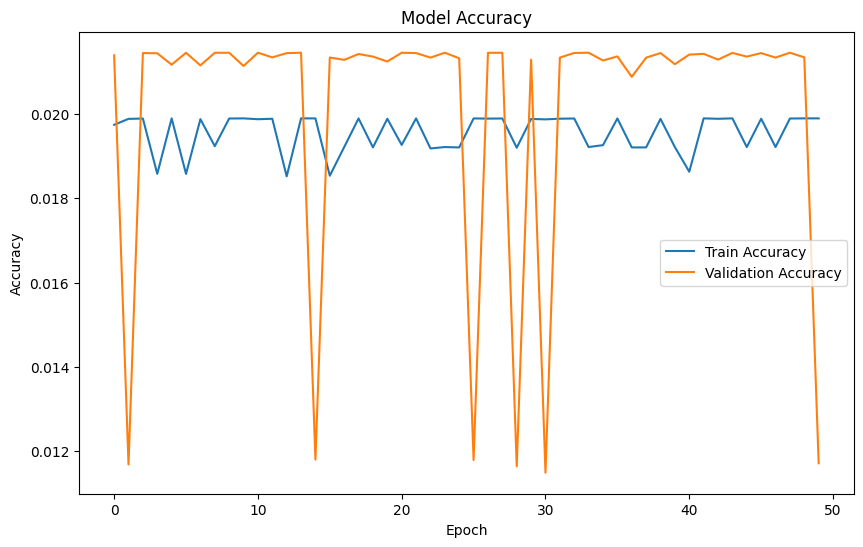

In [43]:
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Assuming 'history' is already generated after model training

# Plot the accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Save the plot as an image (e.g., PNG format)
plt.savefig('/content/accuracy_plot.jpg')  # Save the plot to the current working directory

# If running in Google Colab, download the image to your local machine
from google.colab import files
files.download('/content/accuracy_plot.jpg')  # Download the plot image
